In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium as fo
from datetime import datetime


In [2]:
file = pd.read_csv('/Users/irsathazeez/Desktop/EarthQuake.csv')

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [4]:
file.shape

(37331, 23)

In [5]:
file.columns

Index(['Time', 'Place', 'Latitude', 'Longitude', 'Depth', 'Mag', 'MagType',
       'nst', 'gap', 'dmin', 'rms', 'net', 'ID', 'Updated', 'Unnamed: 14',
       'Type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
file.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [7]:
file['Time'] = file['Time'].apply(lambda x: datetime.fromisoformat(x.rstrip('Z')) ) #converts string to datetime object of zulu time

In [8]:
file.dtypes

Time               datetime64[ns]
Place                      object
Latitude                  float64
Longitude                 float64
Depth                     float64
Mag                       float64
MagType                    object
nst                       float64
gap                       float64
dmin                      float64
rms                       float64
net                        object
ID                         object
Updated                    object
Unnamed: 14               float64
Type                       object
horizontalError           float64
depthError                float64
magError                  float64
magNst                    float64
status                     object
locationSource             object
magSource                  object
dtype: object

In [9]:
file['Year'] = file['Time'].dt.year
# file['Month'] = file['Time'].dt.month
# file['Day'] = file['Time'].dt.day
# file['Hour'] = file['Time'].dt.hour
# file['Minute'] = file['Time'].dt.minute

In [10]:
file.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Year
0,2023-02-17 09:37:34.868,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us,2023
1,2023-02-16 05:37:05.138,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us,2023
2,2023-02-15 18:10:10.060,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us,2023
3,2023-02-15 06:38:09.034,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us,2023
4,2023-02-14 13:16:51.072,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us,2023


In [11]:
file.insert(1, 'Year', file.pop('Year'))

In [12]:
file.head(10)

,Time,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17 09:37:34.868,2023,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16 05:37:05.138,2023,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15 18:10:10.060,2023,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15 06:38:09.034,2023,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14 13:16:51.072,2023,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us
5,2023-02-13 09:18:07.995,2023,"Kermadec Islands, New Zealand",-29.5218,-177.9727,374.033,6.1,mww,47.0,178.0,...,2023-02-14T09:20:59.238Z,NaN,earthquake,15.39,5.630,0.093,11.0,reviewed,us,us
6,2023-02-11 15:31:26.464,2023,Tristan da Cunha region,-35.3341,-15.6399,10.000,5.6,mww,55.0,84.0,...,2023-02-12T15:34:52.841Z,NaN,earthquake,8.13,1.789,0.073,18.0,reviewed,us,us
7,2023-02-11 08:55:07.845,2023,NaN,3.6213,126.6944,48.780,5.9,mww,130.0,37.0,...,2023-02-12T08:58:20.552Z,NaN,earthquake,2.62,5.729,0.054,33.0,reviewed,us,us
8,2023-02-09 21:12:19.743,2023,Carlsberg Ridge,-1.2376,67.5366,10.000,5.5,mww,53.0,50.0,...,2023-02-14T14:31:35.223Z,NaN,earthquake,5.45,1.884,0.062,25.0,reviewed,us,us
9,2023-02-09 10:53:17.268,2023,"45 km SW of Kirakira, Solomon Islands",-10.7636,161.6440,35.000,5.5,mww,86.0,31.0,...,2023-02-10T10:56:36.462Z,NaN,earthquake,8.17,1.817,0.065,23.0,reviewed,us,us


In [13]:
file['Year'].value_counts().sort_index(ascending=False)

2023     62
2022    447
2021    561
2020    404
2019    443
       ... 
1904      9
1903      5
1902      2
1901      3
1900      1
Name: Year, Length: 124, dtype: int64

In [14]:
# file.sort_values(by='Time')
file.shape

(37331, 24)

In [15]:
file.isnull().sum()

Time                   0
Year                   0
Place                284
Latitude               0
Longitude              0
Depth                134
Mag                    0
MagType                0
nst                29858
gap                27244
dmin               32936
rms                17113
net                    0
ID                     0
Updated                0
Unnamed: 14        37331
Type                   0
horizontalError    33361
depthError         16504
magError           20780
magNst             31959
status                 0
locationSource         0
magSource              0
dtype: int64

In [16]:
file.drop(['Unnamed: 14','horizontalError', 'magError'], axis=1, inplace=True)

In [17]:
file = file[file['Place'].notnull()]

In [18]:
file.shape

(37047, 21)

In [19]:
file.isnull().sum() 

Time                  0
Year                  0
Place                 0
Latitude              0
Longitude             0
Depth               134
Mag                   0
MagType               0
nst               29655
gap               27056
dmin              32697
rms               16987
net                   0
ID                    0
Updated               0
Type                  0
depthError        16392
magNst            31721
status                0
locationSource        0
magSource             0
dtype: int64

In [20]:
file.duplicated().sum()

0

In [21]:
file.shape

(37047, 21)

In [22]:
meta = {'nst' : 'The total number of seismic stations used to determine earthquake location.',\
        'dmin' : 'Horizontal distance from the epicenter to the nearest station.',\
        'gap' : 'a segment of a plate boundary that has not ruptured recently has the greatest chance of rupturing in the future (relative to other segments that have experienced large earthquakes)',\
        'depth':'Shallow earthquakes are between 0 and 70 km deep; intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 300 - 700 km deep.',\
        'magType':'The method or algorithm used to calculate the preferred magnitude for the event.',\
        'type':'Type of seismic event.',\
        'Mag': 'Magnitude is the size of the earthquake',\
        'rms': 'In general, the smaller this number, the more reliable is the calculated depth of the earthquake'}

In [23]:
file.columns

Index(['Time', 'Year', 'Place', 'Latitude', 'Longitude', 'Depth', 'Mag',
       'MagType', 'nst', 'gap', 'dmin', 'rms', 'net', 'ID', 'Updated', 'Type',
       'depthError', 'magNst', 'status', 'locationSource', 'magSource'],
      dtype='object')

In [24]:
file.head()

,Time,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,...,rms,net,ID,Updated,Type,depthError,magNst,status,locationSource,magSource
0,2023-02-17 09:37:34.868,2023,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,...,0.76,us,us6000jpl7,2023-02-17T17:58:24.040Z,earthquake,5.595,23.0,reviewed,us,us
1,2023-02-16 05:37:05.138,2023,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,...,0.94,us,us6000jpb1,2023-02-17T05:41:32.448Z,earthquake,6.080,18.0,reviewed,us,us
2,2023-02-15 18:10:10.060,2023,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,...,0.54,us,us6000jp76,2023-02-16T20:12:32.595Z,earthquake,4.399,71.0,reviewed,us,us
3,2023-02-15 06:38:09.034,2023,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,...,1.15,us,us6000jp1g,2023-02-16T06:42:09.738Z,earthquake,4.922,23.0,reviewed,us,us
4,2023-02-14 13:16:51.072,2023,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,...,0.40,us,us6000jnqz,2023-02-17T09:15:18.586Z,earthquake,1.794,95.0,reviewed,us,us


In [25]:
Turkey = file[(file['Place'].str.contains('Turkey')) | (file['Place'].str.contains('turkey'))]

In [26]:
meta

{'nst': 'The total number of seismic stations used to determine earthquake location.',
 'dmin': 'Horizontal distance from the epicenter to the nearest station.',
 'gap': 'a segment of a plate boundary that has not ruptured recently has the greatest chance of rupturing in the future (relative to other segments that have experienced large earthquakes)',
 'depth': 'Shallow earthquakes are between 0 and 70 km deep; intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 300 - 700 km deep.',
 'magType': 'The method or algorithm used to calculate the preferred magnitude for the event.',
 'type': 'Type of seismic event.',
 'Mag': 'Magnitude is the size of the earthquake',
 'rms': 'In general, the smaller this number, the more reliable is the calculated depth of the earthquake'}

In [27]:
Turkey.isnull().sum()

Time                0
Year                0
Place               0
Latitude            0
Longitude           0
Depth               0
Mag                 0
MagType             0
nst               254
gap               250
dmin              286
rms               230
net                 0
ID                  0
Updated             0
Type                0
depthError         71
magNst            280
status              0
locationSource      0
magSource           0
dtype: int64

In [28]:
Turkey.duplicated().sum()   

0

In [29]:
Turkey.head()

,Time,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,...,rms,net,ID,Updated,Type,depthError,magNst,status,locationSource,magSource
11,2023-02-07 03:13:12.767,2023,"8 km ESE of Gölba??, Turkey",37.7582,37.7303,10.000,5.5,mww,131.0,45.0,...,0.60,us,us6000jm5e,2023-02-09T21:31:31.564Z,earthquake,1.699,25.0,reviewed,us,us
13,2023-02-06 12:02:11.825,2023,"5 km NE of Göksun, Turkey",38.0605,36.5370,10.000,6.0,mb,116.0,29.0,...,1.00,us,us6000jlrc,2023-02-16T21:13:41.161Z,earthquake,1.811,513.0,reviewed,us,us
14,2023-02-06 10:51:30.942,2023,"16 km ENE of Do?an?ehir, Turkey",38.1236,38.0529,12.336,5.7,mb,88.0,69.0,...,0.97,us,us6000jlql,2023-02-08T06:06:26.219Z,earthquake,4.266,139.0,reviewed,us,us
15,2023-02-06 10:35:58.653,2023,"13 km SW of Do?an?ehir, Turkey",38.0084,37.7505,10.000,5.8,mb,67.0,67.0,...,0.88,us,us6000jlqe,2023-02-07T10:41:46.479Z,earthquake,1.844,112.0,reviewed,us,us
16,2023-02-06 10:26:48.486,2023,Central Turkey,38.0302,37.9636,20.094,6.0,mb,59.0,63.0,...,0.62,us,us6000jm1y,2023-02-11T19:40:16.234Z,earthquake,4.649,53.0,reviewed,us,us


In [30]:
# Turkey[Turkey.duplicated(['Year','Mag'])].head(20) #Check with professor
# Turkey.duplicated(['Year','Mag']).sum()
# Turkey[Turkey.duplicated(['Year','Mag'])]

In [31]:
Turkey.set_index('Time', inplace=True)

In [32]:
print(Turkey['Year'].min(),'-', Turkey['Year'].max())

1905 - 2023


In [33]:
max_Mag_Turkey = Turkey.groupby('Year')['Mag'].max()
max_Mag_Turkey

Year
1905    6.80
1909    6.31
1910    6.51
1911    5.62
1912    7.23
        ... 
2017    5.60
2019    5.90
2020    6.70
2022    6.10
2023    7.80
Name: Mag, Length: 93, dtype: float64

In [34]:
from dateutil.parser import parse

In [35]:
# max_Mag_Turkey.index.astype(str)

In [36]:
max_Mag_Turkey.sort_values(ascending=False).head(10)

Year
2023    7.80
1939    7.80
1999    7.60
1944    7.60
1943    7.50
1957    7.30
1976    7.30
1953    7.30
1967    7.29
1912    7.23
Name: Mag, dtype: float64

In [37]:
Turkey[(Turkey['Year'] == 2023) & (Turkey['Mag'] == 7.8)] # checking if there is any other earthquake with same magnitude in a same year

,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,rms,net,ID,Updated,Type,depthError,magNst,status,locationSource,magSource
Time,,,,,,,,,,,,,,,,,,,,
2023-02-06 01:17:35.525,2023,"27 km E of Nurda??, Turkey",37.1662,37.0421,17.943,7.8,mww,216.0,17.0,0.134,0.67,us,us6000jllz,2023-02-17T20:33:16.918Z,earthquake,3.278,38.0,reviewed,us,us


In [38]:
Turkey[(Turkey['Year'] == 1939) & (Turkey['Mag'] == 7.8)] # checking if there is any other earthquake with same magnitude in a same year

,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,rms,net,ID,Updated,Type,depthError,magNst,status,locationSource,magSource
Time,,,,,,,,,,,,,,,,,,,,
1939-12-26 23:57:23.820,1939,"20 km NNE of Erzincan, Turkey",39.907,39.586,20.0,7.8,mw,NaN,NaN,NaN,NaN,iscgem,iscgem902291,2022-04-25T20:51:33.901Z,earthquake,4.8,NaN,reviewed,iscgem,iscgem


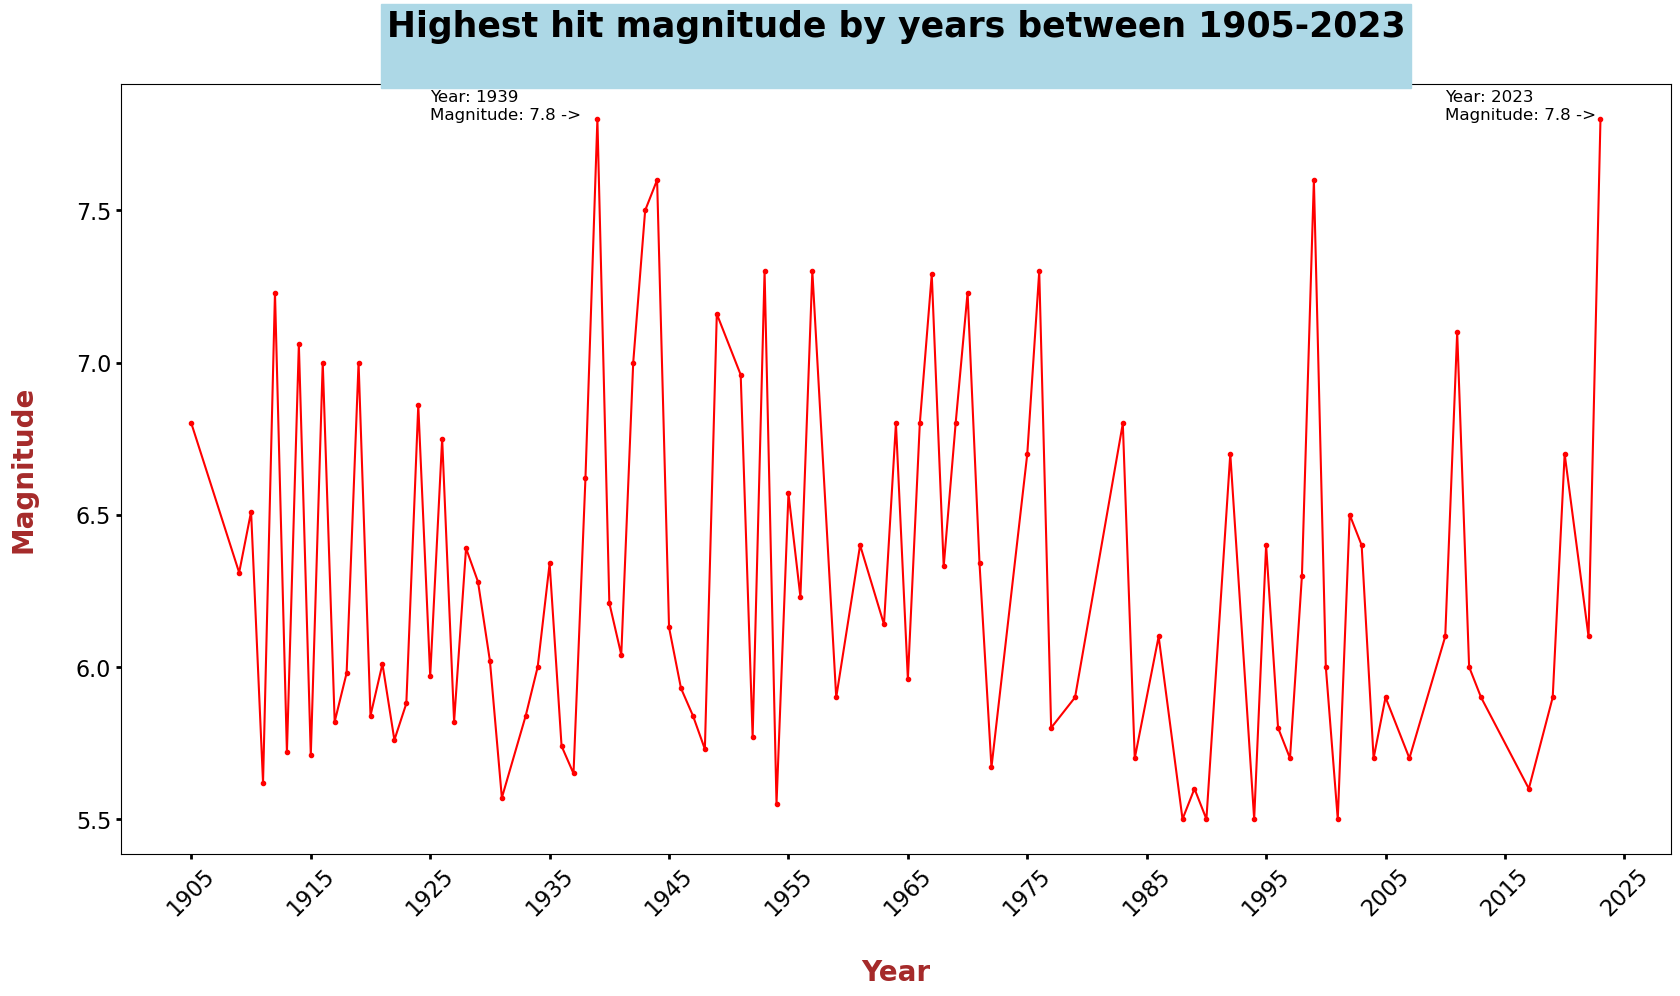

In [83]:
plt.figure(figsize=(20,10))
plt.title('Highest hit magnitude by years between 1905-2023\n', fontsize=25, fontweight='bold', backgroundcolor='lightblue')
plt.xlabel('\nYear', fontsize=20, fontweight='bold', color='brown')
plt.ylabel('Magnitude\n', fontsize=20, fontweight='bold', color='brown')
plt.plot(max_Mag_Turkey.index, max_Mag_Turkey.values, 'r.-')
# plt.xlim(1900,2025)
plt.plot()
plt.tick_params(axis='both', labelsize=16, width=2)
# plt.tight_layout()
plt.xticks(range(1905,2026,10),rotation=45)
# plt.yticks(range(14))
plt.annotate('Year: 2023\nMagnitude: 7.8 ->', xy=(2020, 7.8), xytext=(2010, 7.8), fontsize=12)
plt.annotate('Year: 1939\nMagnitude: 7.8 ->', xy=(1939, 7.8), xytext=(1925, 7.8), fontsize=12)
plt.show()

In [40]:
Highest_Mag = Turkey[Turkey.groupby('Year')['Mag'].transform(max) == Turkey['Mag']][['Year','Latitude','Longitude','Mag','Place']]

In [41]:
Highest_Mag.shape

(98, 5)

In [42]:
Highest_Mag = Highest_Mag.sort_values(by='Mag', ascending=False)
Highest_Mag.head(10)

,Year,Latitude,Longitude,Mag,Place
Time,,,,,
2023-02-06 01:17:35.525,2023,37.1662,37.0421,7.80,"27 km E of Nurda??, Turkey"
1939-12-26 23:57:23.820,1939,39.9070,39.5860,7.80,"20 km NNE of Erzincan, Turkey"
1999-08-17 00:01:39.130,1999,40.7480,29.8640,7.60,"4 km ESE of Derince, Turkey"
1944-02-01 03:22:40.830,1944,40.6600,32.9980,7.60,"10 km WNW of Orta, Turkey"
1943-11-26 22:20:48.560,1943,40.8670,33.6510,7.50,"6 km SSE of Ilgaz, Turkey"
1976-11-24 12:22:18.800,1976,39.1210,44.0290,7.30,"47 km S of Do?ubayaz?t, Turkey"
1953-03-18 19:06:17.740,1953,40.1750,27.6480,7.30,"7 km N of Gönen, Turkey"
1957-04-25 02:25:41.160,1957,36.4050,28.6990,7.30,"34 km S of Sarigerme, Turkey"
1967-07-22 16:57:00.700,1967,40.7510,30.8000,7.29,"6 km SE of Hendek, Turkey"


In [43]:
# Highest_Mag[Highest_Mag.duplicated(['Year','Mag'], keep=False)]

In [44]:
# c = ab.duplicated(['Year','Mag']).sum()

In [45]:
# ab[ab.duplicated(['Year','Mag'])]

In [46]:
max_Mag_Turkey.shape

(93,)

In [47]:
Highest_Mag

,Year,Latitude,Longitude,Mag,Place
Time,,,,,
2023-02-06 01:17:35.525,2023,37.1662,37.0421,7.8,"27 km E of Nurda??, Turkey"
1939-12-26 23:57:23.820,1939,39.9070,39.5860,7.8,"20 km NNE of Erzincan, Turkey"
1999-08-17 00:01:39.130,1999,40.7480,29.8640,7.6,"4 km ESE of Derince, Turkey"
1944-02-01 03:22:40.830,1944,40.6600,32.9980,7.6,"10 km WNW of Orta, Turkey"
1943-11-26 22:20:48.560,1943,40.8670,33.6510,7.5,"6 km SSE of Ilgaz, Turkey"
...,...,...,...,...,...
2001-06-25 13:28:46.510,2001,37.2380,36.2060,5.5,"17 km SSE of Kadirli, Turkey"
1988-04-20 03:50:08.390,1988,39.1090,44.1230,5.5,Turkey-Iran border region
1988-06-25 16:15:38.340,1988,38.4580,43.0380,5.5,"19 km NNW of Geva?, Turkey"


In [48]:
Highest_Mag.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2023-02-06 01:17:35.525000 to 1994-05-24 02:05:36.290000
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       98 non-null     int64  
 1   Latitude   98 non-null     float64
 2   Longitude  98 non-null     float64
 3   Mag        98 non-null     float64
 4   Place      98 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.6+ KB


In [81]:
Turkey_map = fo.Map(location=[39.1667, 35.6667], prefer_canvas= True, zoom_start=6)
# Turkey_map.get_root().html.add_child(fo.Element('<h1 align="center" style="color:black; background-color:lightblue">\
#     Highest Magnitude hit locations by years from 1905-2023<br> </h1>'))
# fo.TileLayer('http://tile.stamen.com/terrain/{z}/{x}/{y}.png', 
#                 attr='&copy; <a href="https://stamen.com">Stamen</a>', 
#                 name='English Labels',
#                 overlay=False).add_to(Turkey_map)
location= []
for i in Highest_Mag.index:
    location.append([Highest_Mag.loc[i,'Latitude'], Highest_Mag.loc[i,'Longitude']])

for i,j in zip(location,Highest_Mag.index):
    if Highest_Mag.loc[j, 'Mag']  >= 7.0:
        fo.Marker(location=i, popup= 'Year: {}\nMag: {}'.format(Highest_Mag.loc[j,'Year'], Highest_Mag.loc[j,'Mag']), icon=fo.Icon(color='red')).add_to(Turkey_map)
    elif Highest_Mag.loc[j, 'Mag']  >= 6.0:
        fo.Marker(location=i, popup= 'Year: {}\nMag: {}'.format(Highest_Mag.loc[j,'Year'], Highest_Mag.loc[j,'Mag']), icon=fo.Icon(color='orange')).add_to(Turkey_map)
    else:
        fo.Marker(location=i, popup= 'Year: {}\nMag: {}'.format(Highest_Mag.loc[j,'Year'], Highest_Mag.loc[j,'Mag']), icon=fo.Icon(color='blue')).add_to(Turkey_map)

fo.CircleMarker(location=location[0], radius=20, popup='Turkey', color='red', fill=True).add_to(Turkey_map)
fo.CircleMarker(location=location[1], radius=20, popup='Turkey', color='red', fill=True).add_to(Turkey_map)
fo.CircleMarker(location=location[2], radius=20, popup='Turkey', color='red', fill=True).add_to(Turkey_map)
fo.CircleMarker(location=location[3], radius=20, popup='Turkey', color='red', fill=True).add_to(Turkey_map)

In [50]:
# fo.LayerControl().add_to(Turkey_map)
# fo.TileLayer('cartodbpositron').add_to(Turkey_map)


In [82]:
Turkey_map

In [52]:
k = Turkey['Year'].value_counts().sort_index(ascending=False)
k

2023    11
2022     1
2020     7
2019     3
2017     1
        ..
1912     4
1911     1
1910     1
1909     3
1905     4
Name: Year, Length: 93, dtype: int64

In [53]:
k[k.index>2011].sum()

26

In [54]:
earth_range = {}
for i, j in zip(range(1905,2035, 10), range(1915,2035,10)):
    earth_range.update({'{}-{}'.format(i,j): k[(k.index>=i) & (k.index<j)].sum()})

In [55]:
earth_range

{'1905-1915': 17,
 '1915-1925': 29,
 '1925-1935': 25,
 '1935-1945': 52,
 '1945-1955': 28,
 '1955-1965': 20,
 '1965-1975': 30,
 '1975-1985': 16,
 '1985-1995': 12,
 '1995-2005': 30,
 '2005-2015': 28,
 '2015-2025': 23}

In [56]:
earth_range = pd.Series(earth_range).sort_index()

In [57]:
earth_range

1905-1915    17
1915-1925    29
1925-1935    25
1935-1945    52
1945-1955    28
1955-1965    20
1965-1975    30
1975-1985    16
1985-1995    12
1995-2005    30
2005-2015    28
2015-2025    23
dtype: int64

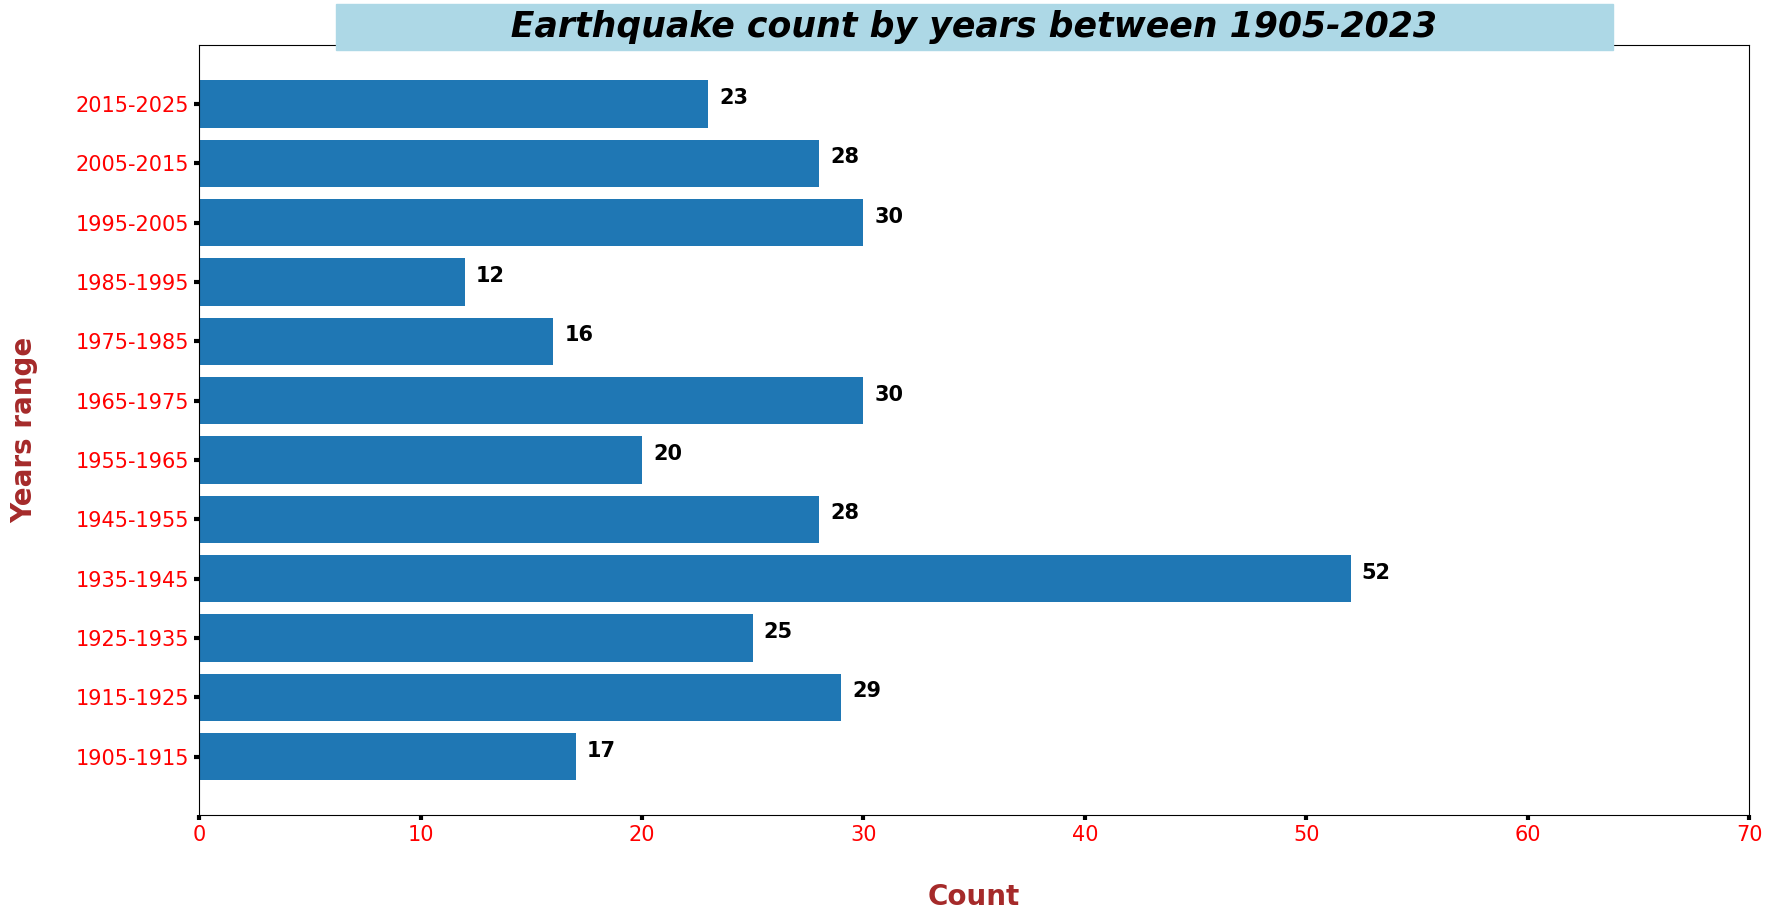

In [79]:
plt.figure(figsize=(20,10))
plt.title('              Earthquake count by years between 1905-2023              ', fontsize=25, fontweight='bold', color='black', fontstyle='italic', backgroundcolor='lightblue')
plt.barh(earth_range.index, earth_range.values)
# plt.xticks(earth_range.values)
plt.xlim(0, 70)
plt.tick_params(axis='both', labelsize=15, width=3, labelcolor='r')
plt.xlabel('\nCount', fontsize=20, fontweight='bold', color='brown')
plt.ylabel('Years range\n', fontsize=20,fontweight='bold', color='brown')
for i, v in enumerate(earth_range.values):
    plt.text(v+0.5, i, str(v), color='black', fontsize=15, fontweight='bold')

plt.show()

In [59]:
Turkey[Turkey.groupby('Year')['Mag'].transform(max) == Turkey['Mag']].head()

,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,rms,net,ID,Updated,Type,depthError,magNst,status,locationSource,magSource
Time,,,,,,,,,,,,,,,,,,,,
2023-02-06 01:17:35.525,2023,"27 km E of Nurda??, Turkey",37.1662,37.0421,17.943,7.8,mww,216.0,17.0,0.134,0.67,us,us6000jllz,2023-02-17T20:33:16.918Z,earthquake,3.278,38.0,reviewed,us,us
2022-11-23 01:08:15.435,2022,"15 km W of Düzce, Turkey",40.8356,30.9831,10.000,6.1,mww,286.0,14.0,0.399,0.64,us,us7000irp8,2023-02-07T07:10:15.191Z,earthquake,1.647,35.0,reviewed,us,us
2020-01-24 17:55:14.147,2020,"13 km N of Do?anyol, Turkey",38.4312,39.0609,10.000,6.7,mww,NaN,49.0,0.870,0.69,us,us60007ewc,2022-03-10T05:02:23.447Z,earthquake,1.800,51.0,reviewed,us,us
2019-08-08 11:25:31.104,2019,"9 km ESE of Baklan, Turkey",37.9350,29.7003,11.000,5.9,mww,NaN,25.0,0.646,0.96,us,us6000529r,2020-07-10T17:33:55.739Z,earthquake,1.700,64.0,reviewed,us,us
2017-03-02 11:07:26.880,2017,"5 km NW of Samsat, Turkey",37.6160,38.4305,10.000,5.6,mww,NaN,30.0,1.068,0.61,us,us100086gw,2022-05-03T18:11:51.848Z,earthquake,1.000,31.0,reviewed,us,us


In [60]:
Total_earthquake = Turkey['Year'].value_counts().values.sum()
Total_earthquake 
# earth_range.values.sum()

310

In [61]:
HM = Turkey['Mag'].max()
LM = Turkey['Mag'].min()
Avg_Mag = Turkey['Mag'].mean().round(2)
Avg_depth = Turkey['Depth'].mean().round(2)
min_depth = Turkey['Depth'].min()
max_depth = Turkey['Depth'].max()
LM, HM, Avg_Mag, Avg_depth, min_depth, max_depth

(5.5, 7.8, 5.94, 16.86, 2.6, 135.3)

## additional analysis

In [62]:
years_not_EQ = []
for year in range(Turkey['Year'].min(), Turkey['Year'].max()+1):
    if year not in Turkey['Year'].value_counts().index:
        years_not_EQ.append(year)
    

In [63]:
len(years_not_EQ)

26

In [64]:
for year in years_not_EQ:
    print(year, end=', ')

1906, 1907, 1908, 1932, 1950, 1958, 1960, 1962, 1973, 1974, 1978, 1980, 1981, 1982, 1985, 1987, 1991, 1993, 2006, 2008, 2009, 2014, 2015, 2016, 2018, 2021, 

In [65]:
meta

{'nst': 'The total number of seismic stations used to determine earthquake location.',
 'dmin': 'Horizontal distance from the epicenter to the nearest station.',
 'gap': 'a segment of a plate boundary that has not ruptured recently has the greatest chance of rupturing in the future (relative to other segments that have experienced large earthquakes)',
 'depth': 'Shallow earthquakes are between 0 and 70 km deep; intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 300 - 700 km deep.',
 'magType': 'The method or algorithm used to calculate the preferred magnitude for the event.',
 'type': 'Type of seismic event.',
 'Mag': 'Magnitude is the size of the earthquake',
 'rms': 'In general, the smaller this number, the more reliable is the calculated depth of the earthquake'}

# magnitude in 2023 in Turkey

In [66]:
Turkey_2023 = Turkey[Turkey['Year'] == 2023]
Turkey_2023_mag = Turkey[Turkey['Year'] == 2023][['Mag']].sort_index(ascending=False)
Turkey_2023_mag

,Mag
Time,
2023-02-07 03:13:12.767,5.5
2023-02-06 12:02:11.825,6.0
2023-02-06 10:51:30.942,5.7
2023-02-06 10:35:58.653,5.8
2023-02-06 10:26:48.486,6.0
2023-02-06 10:24:49.258,7.5
2023-02-06 02:03:36.258,5.5
2023-02-06 01:36:27.357,5.6
2023-02-06 01:28:15.984,6.7


In [67]:
meta

{'nst': 'The total number of seismic stations used to determine earthquake location.',
 'dmin': 'Horizontal distance from the epicenter to the nearest station.',
 'gap': 'a segment of a plate boundary that has not ruptured recently has the greatest chance of rupturing in the future (relative to other segments that have experienced large earthquakes)',
 'depth': 'Shallow earthquakes are between 0 and 70 km deep; intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 300 - 700 km deep.',
 'magType': 'The method or algorithm used to calculate the preferred magnitude for the event.',
 'type': 'Type of seismic event.',
 'Mag': 'Magnitude is the size of the earthquake',
 'rms': 'In general, the smaller this number, the more reliable is the calculated depth of the earthquake'}

In [68]:
Turkey_2023.isnull().sum()

Year              0
Place             0
Latitude          0
Longitude         0
Depth             0
Mag               0
MagType           0
nst               0
gap               0
dmin              0
rms               0
net               0
ID                0
Updated           0
Type              0
depthError        0
magNst            0
status            0
locationSource    0
magSource         0
dtype: int64

In [69]:
Turkey_2023['gap']

Time
2023-02-07 03:13:12.767    45.0
2023-02-06 12:02:11.825    29.0
2023-02-06 10:51:30.942    69.0
2023-02-06 10:35:58.653    67.0
2023-02-06 10:26:48.486    63.0
2023-02-06 10:24:49.258    17.0
2023-02-06 02:03:36.258    45.0
2023-02-06 01:36:27.357    47.0
2023-02-06 01:28:15.984    19.0
2023-02-06 01:17:35.525    17.0
2023-01-18 10:08:14.083    59.0
Name: gap, dtype: float64

In [70]:
Turkey_2023['Depth']

Time
2023-02-07 03:13:12.767    10.000
2023-02-06 12:02:11.825    10.000
2023-02-06 10:51:30.942    12.336
2023-02-06 10:35:58.653    10.000
2023-02-06 10:26:48.486    20.094
2023-02-06 10:24:49.258    10.000
2023-02-06 02:03:36.258    10.000
2023-02-06 01:36:27.357    10.000
2023-02-06 01:28:15.984    10.708
2023-02-06 01:17:35.525    17.943
2023-01-18 10:08:14.083    18.523
Name: Depth, dtype: float64

(-0.5, 10.5, 5.385, 7.915)


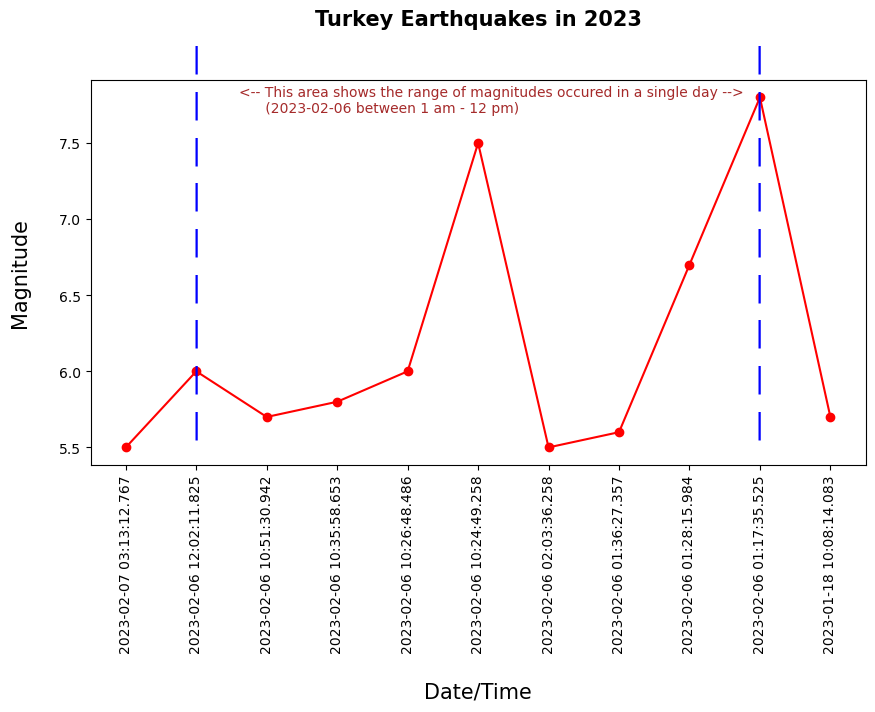

In [71]:
plt.figure(figsize=(10,5))
plt.title('Turkey Earthquakes in 2023\n\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDate/Time', fontsize=15)
plt.ylabel('Magnitude\n', fontsize=15)
plt.plot(Turkey_2023_mag.index.astype(str), Turkey_2023_mag['Mag'], color='red', marker='o')
plt.xticks(rotation=90)
j = 8
for i in range(11,2,-1 ):
    plt.text(1-0.07, j, '|', color='blue', fontsize=20)
    plt.text(9-0.07, j, '|', color='blue', fontsize=20)
    j = j-0.3
plt.text(1.6, 7.7, '<-- This area shows the range of magnitudes occured in a single day -->\n      (2023-02-06 between 1 am - 12 pm)', color='brown', fontsize=10)
print(plt.axis())
plt.show()


show the locations in a map

In [72]:
Turkey_map = fo.Map(location=[39.1667, 35.6667], zoom_start=5)
Turkey_map

## Japan Data

In [73]:
Japan = file[file['Place'].str.contains('Japan')]

In [74]:
Japan.shape

(3039, 21)

In [75]:
Japan.head()

,Time,Year,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,...,rms,net,ID,Updated,Type,depthError,magNst,status,locationSource,magSource
24,2023-02-05 00:03:19.589,2023,"Izu Islands, Japan region",32.6723,141.7624,10.000,5.8,mww,176.0,72.0,...,0.85,us,us6000jlh9,2023-02-06T00:10:18.635Z,earthquake,1.813,29.0,reviewed,us,us
44,2023-01-16 04:49:51.935,2023,"Bonin Islands, Japan region",28.9804,139.3452,405.000,6.3,mww,345.0,11.0,...,0.59,us,us7000j4mj,2023-02-01T04:01:59.206Z,earthquake,1.813,96.0,reviewed,us,us
66,2022-12-24 08:35:41.508,2022,"Bonin Islands, Japan region",28.2943,138.8056,519.989,5.5,mww,223.0,28.0,...,0.67,us,us6000jbf0,2023-02-01T13:02:00.337Z,earthquake,4.558,17.0,reviewed,us,us
71,2022-12-17 18:06:02.988,2022,"25 km ESE of Miyazaki, Japan",31.7958,131.6429,30.000,5.6,mww,204.0,70.0,...,0.94,us,us6000ja1a,2023-01-25T17:20:56.780Z,earthquake,1.800,20.0,reviewed,us,us
76,2022-12-13 14:25:17.214,2022,"95 km S of Naze, Japan",27.5074,129.5492,19.000,5.6,mww,151.0,29.0,...,0.57,us,us6000j901,2023-01-08T22:02:23.918Z,earthquake,1.509,31.0,reviewed,us,us


In [76]:
Japan.isnull().sum()

Time                 0
Year                 0
Place                0
Latitude             0
Longitude            0
Depth                0
Mag                  0
MagType              0
nst               2353
gap               2210
dmin              2786
rms               1583
net                  0
ID                   0
Updated              0
Type                 0
depthError        1055
magNst            2643
status               0
locationSource       0
magSource            0
dtype: int64